In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.drop(columns='Id', inplace = True)

In [4]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Studying the Iris Flower Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# No NULL values present 
# No unusual data values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.head(40)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
df['Species'].value_counts() #Evenly distributed dataset

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
df.shape

(150, 5)

## Data Visualisation

###        || Univariate analysis ||

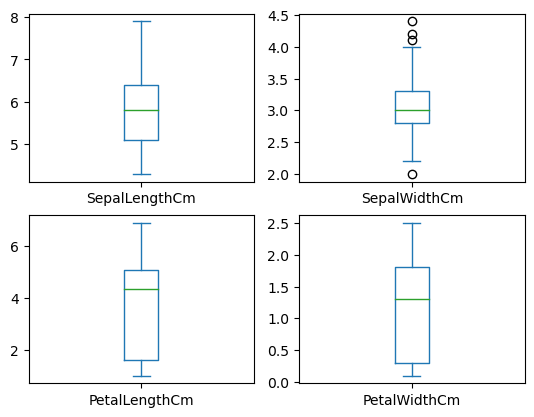

In [11]:
# Data is numerical so we can plot the Boxplot
df.plot(kind = 'box', subplots = True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [12]:
# Outliers are only present in [SepalWidthCm] column 
# values greater than 4 and less than 2.33 are outliers 

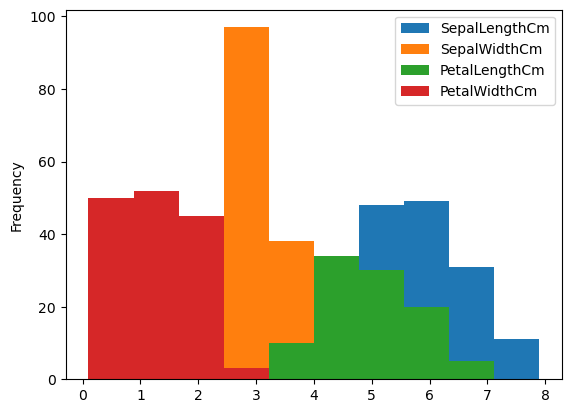

In [13]:
# Data is numercal so we can also plot histogram
df.plot(kind = 'hist')
plt.show()

###  || Multivariate analysis ||

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


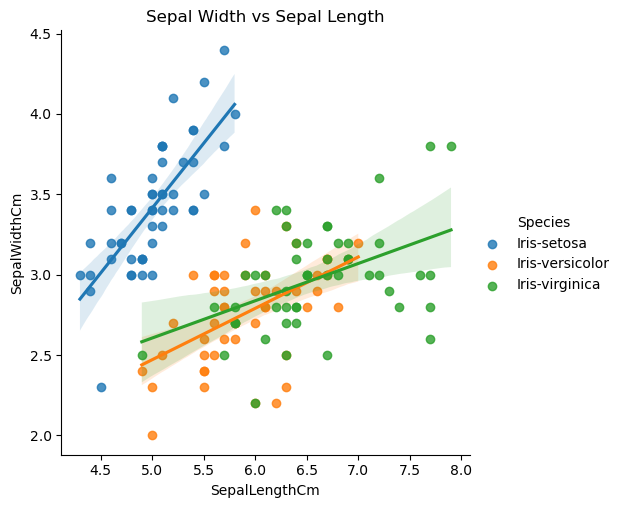

In [14]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species' , data = df)
plt.title('Sepal Width vs Sepal Length')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


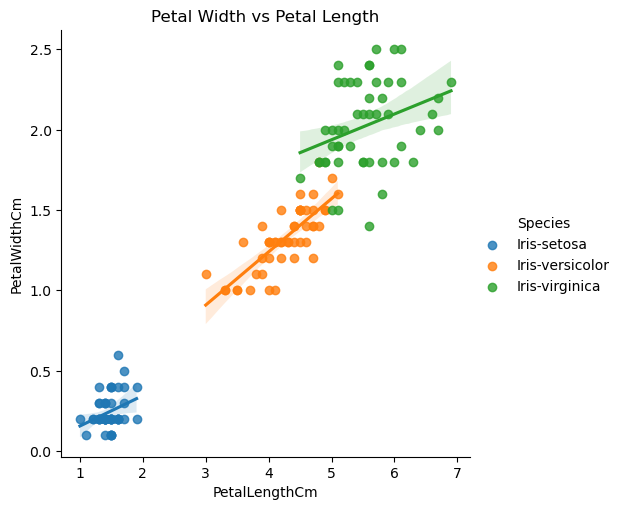

In [15]:

sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species' , data = df)
plt.title('Petal Width vs Petal Length')
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


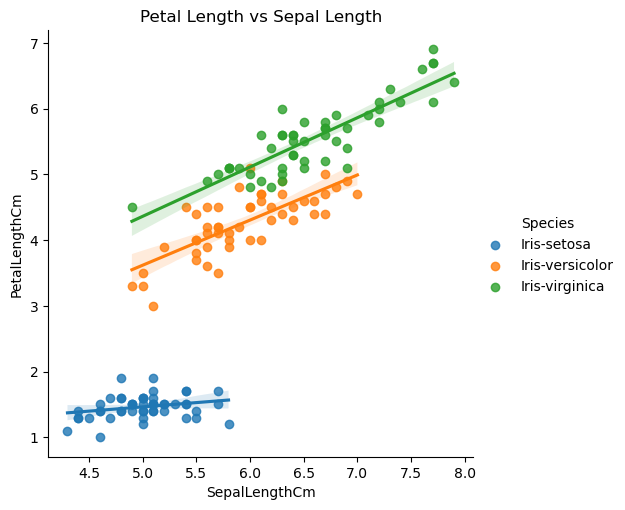

In [16]:

sns.lmplot(x = 'SepalLengthCm', y = 'PetalLengthCm', hue = 'Species', data = df)
plt.title('Petal Length vs Sepal Length')
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


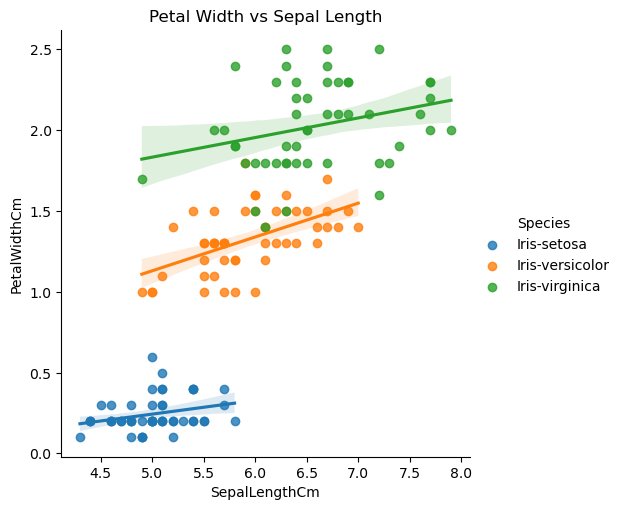

In [17]:

sns.lmplot(x = 'SepalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = df)
plt.title('Petal Width vs Sepal Length')
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


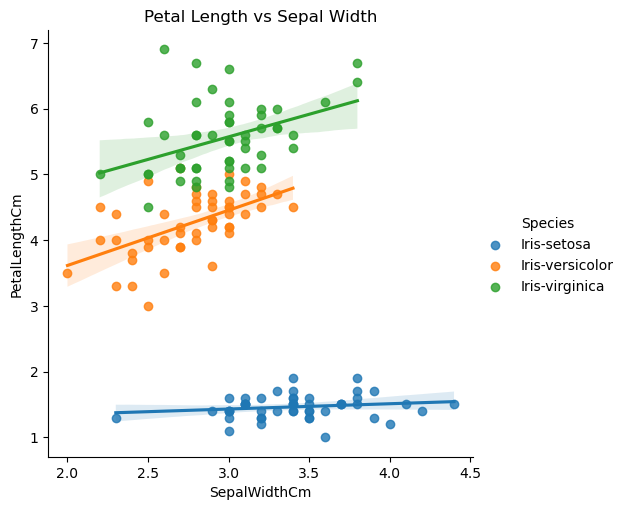

In [18]:

sns.lmplot(x = 'SepalWidthCm', y = 'PetalLengthCm', hue = 'Species', data = df)
plt.title('Petal Length vs Sepal Width')
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


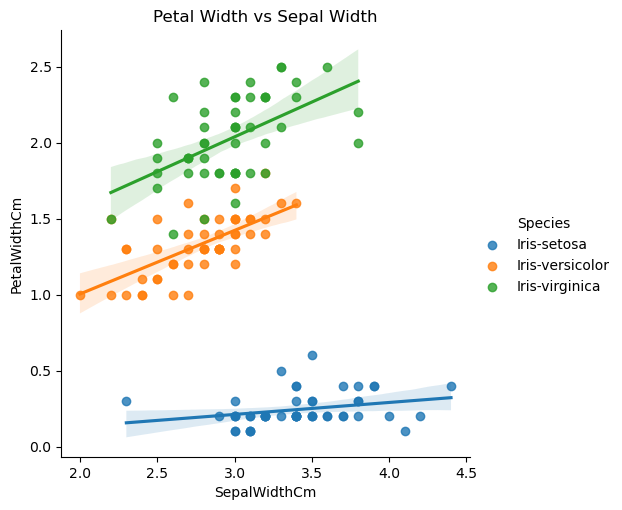

In [19]:

sns.lmplot(x = 'SepalWidthCm', y = 'PetalWidthCm', hue = 'Species', data = df)
plt.title('Petal Width vs Sepal Width')
plt.show()

In [20]:
# Setosa is clearly seperable from Virginica and Versicolor
# Setosa has 
    # Less - PetalWidth, PetalLength, SepalLength
    # High - SepalWidth > other Species's SepalWidth
# Virsicolor has
    # Less - # SepalWidth than Setosa and Virginica both
            # PetalWidth < Virginica
            # PetalLength < Virginica
            # SepalLength < Virginica
# Virginica has
    # High - SepalLength, PetalLength, PetalWidth

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

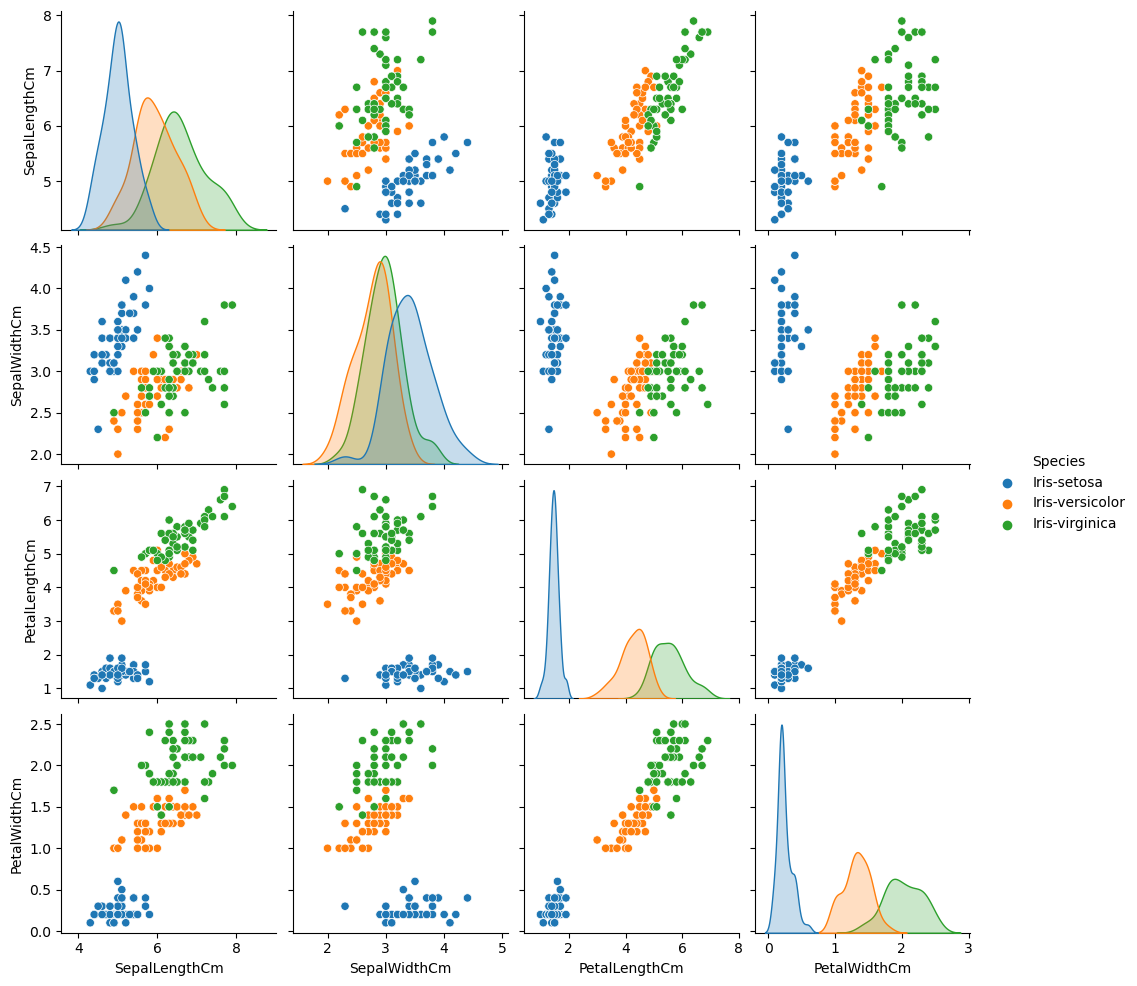

In [21]:
sns.pairplot(df, hue='Species')
plt.show()

#### PetalLength and PetalWidth are very good parameters to Identify Setosa
### PL(Virginica) >> Pl(Virsicolor) >>> PL(Setosa)
### PW(Virginica) >> Pl(Virsicolor) >>> PW(Setosa)

# _______________________________________________________________

## Creating a Validation set / Train_Test_Split

In [22]:
X = df.iloc[:, 0:4]
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=2, test_size = 0.2)

In [23]:
y_test.shape

(30,)

### We will use the StratifiedKFold to estimate the accuracy of the model , Where k = 10, data is split into 10 folds from which in each combination 9 folds are used to train the data and 1 fold is used to test the data , random_state would be fixed

# _______________________________________________________________

## Model Training and finding the best suited model

In [24]:
# creating the model array to test which model will be the best choice for this classification problem
models = []
models.append(('LR', LogisticRegression( max_iter=150,multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis(solver='lsqr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors =3)))
models.append(('CART', DecisionTreeClassifier(max_depth= 3)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel = 'rbf')))

# Calculating the results
results = []
names = []

for name, model in models:
     kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
     cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
     results.append(cv_results)
     names.append(name)
     print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.933333 (0.062361)
LDA: 0.975000 (0.053359)
KNN: 0.950000 (0.066667)
CART: 0.941667 (0.065085)
NB: 0.950000 (0.066667)
SVM: 0.975000 (0.038188)


In [25]:
# SVM and LDA both giving an accuracy of 97.5 % 

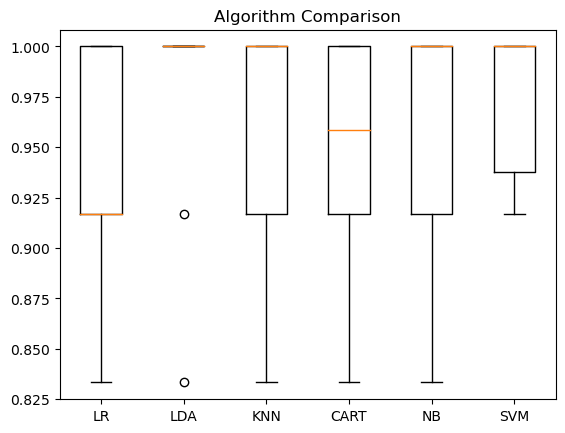

In [26]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Svm with no ouliers but LDA has ouliers

In [27]:
model = SVC(kernel = 'rbf')
model.fit(x_train, y_train)
predictions = model.predict(x_test)

accuracy_score is :-  0.9666666666666667
**********************************************************************
Classification Report is :- 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

**********************************************************************
Confusion matrix of classifier : 
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


**********************************************************************


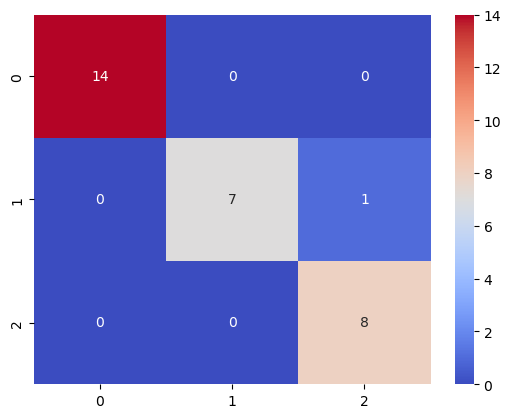

In [28]:
print("accuracy_score is :- ", accuracy_score(y_test, predictions))
print("*******"*10)
print("Classification Report is :- ")
print(classification_report(y_test, predictions))
print("*******"*10)
cm=confusion_matrix(y_test, predictions)
print("Confusion matrix of classifier : \n",cm)
print("\n")
sns.heatmap(cm, annot=True,cmap ='coolwarm')
print("*******"*10)

In [29]:
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors' : [1,2,3,4,5,7,8,9,10,11,12]}
grid_search = GridSearchCV (knn_clf, param_grid,scoring = 'recall_weighted', return_train_score=True)
grid_search.fit(x_train, y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]},
             return_train_score=True, scoring='recall_weighted')

In [30]:
grid_search.best_params_

{'n_neighbors': 3}

In [31]:
def predict_(sl, sw, pl, pw):
    temp= []
    temp.append(sl)
    temp.append(sw)
    temp.append(pw)
    temp.append(pl)
    temp = np.array([temp])
    return model.predict(temp)

## Prediction 1:-


In [32]:
ans = predict_(5.4, 3.9, 1.7, 0.4)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [33]:
## How to make the prediction

## ________________________________________________________________________


# Applying the Perceptron algorithm to the iris dataset

##  Building the Perceptron class to implement it , Classifies only two classes

In [34]:
class Perceptron:
    # Initialization
    def __init__(self, eta = 0.01 , n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    #Fit the model   
    def fit(self, X, Y):
        rgen = np.random.RandomState(self.random_state);
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1+X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi , target in zip(X, Y):
                update = self.eta*(target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    #Predict function where 0.0 is a threshold
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+ self.w_[0]
    def predict(self, X):
        return np.where(self.net_input(X)>= 0.0, 1, -1)

In [35]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## this model cannot classify the Iris- versicolor and Iris-verginica as it is not linearly seperable

In [36]:
data = df[df['Species'] != 'Iris-setosa']

In [37]:
data.drop(columns = ['SepalWidthCm', 'PetalWidthCm'], inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13388\2056276148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['SepalWidthCm', 'PetalWidthCm'], inplace = True)


In [38]:
data['Species'] = np.where(data['Species'] == 'Iris-versicolor', -1, 1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13388\2460924441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Species'] = np.where(data['Species'] == 'Iris-versicolor', -1, 1)


In [39]:
data

,SepalLengthCm,PetalLengthCm,Species
50,7.0,4.7,-1
51,6.4,4.5,-1
52,6.9,4.9,-1
53,5.5,4.0,-1
54,6.5,4.6,-1
...,...,...,...
145,6.7,5.2,1
146,6.3,5.0,1
147,6.5,5.2,1
148,6.2,5.4,1


In [40]:
X =  data.iloc[0:100, 0:2].values
Y = data['Species']

In [41]:
print(X) 
print(Y)

[[7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]
 [6.1 4.6]
 [5.8 4. ]
 [5.  3.3]
 [5.6 4.2]
 [5.7 4.2]
 [5.7 4.2]
 [6.2 4.3]
 [5.1 3. ]
 [5.7 4.1]
 [6.3 6. ]
 [5.8 5.1]
 [7.1 5.9]
 [6.3 5.6]
 [6.5 5.8]
 [7.6 6.6]
 [4.9 4.5]
 [7.3 6.3]
 [6.7 5.8]
 [7.2 6.1]
 [6.5 5.1]
 [6.4 5.3]
 [6.8 5.5]
 [5.7 5. ]
 [5.8 5.1]
 [6.4 5.3]
 [6.5 5.5]
 [7.7 6.7]
 [7.7 6.9]
 [6.  5. ]
 [6.9 5.7]
 [5.6 4.9]
 [7.7 6.7]
 [6.3 4.9]
 [6.7 5.7]
 [7.2 6. ]
 [6.2 4.8]
 [6.1 4.9]
 [6.4 5.6]
 [7.2 5.8]
 [7.4 6.1]
 [7.9 6.4]
 [6.4 5.6]
 [6.3 5.1]
 [6.1 5.6]
 [7.7 6.1]
 [6.3 5.6]
 [6.4 5.5]
 [6.  4.8]
 [6.9 5.4]
 [6.7 5.6]

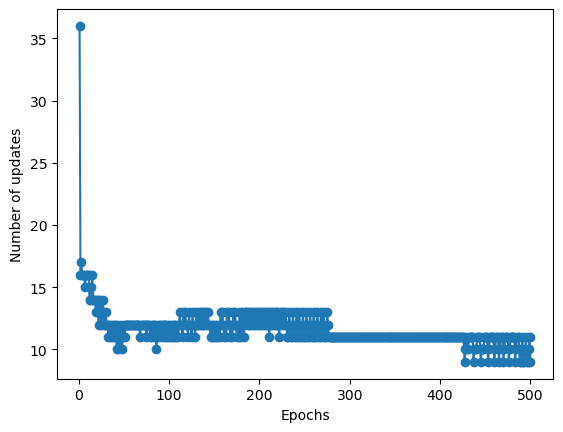

In [42]:
ppn = Perceptron(eta=0.00001, n_iter=500)
ppn.fit(X, Y)
plt.plot(range(1, len(ppn.errors_) + 1), 
    ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [43]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
     # setup marker generator and color map
     markers = ('s', 'x', 'o', '^', 'v')
     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
     cmap = ListedColormap(colors[:len(np.unique(y))])
     # plot the decision surface
     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
     np.arange(x2_min, x2_max, resolution))
     Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
     Z = Z.reshape(xx1.shape)
     plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
     plt.xlim(xx1.min(), xx1.max())
     plt.ylim(xx2.min(), xx2.max())
     # plot class samples
     for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0],
         y=X[y == cl, 1],
         alpha=0.8,
         c=colors[idx],
         marker=markers[idx],
         label=cl,
         edgecolor='black')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13388\496644579.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


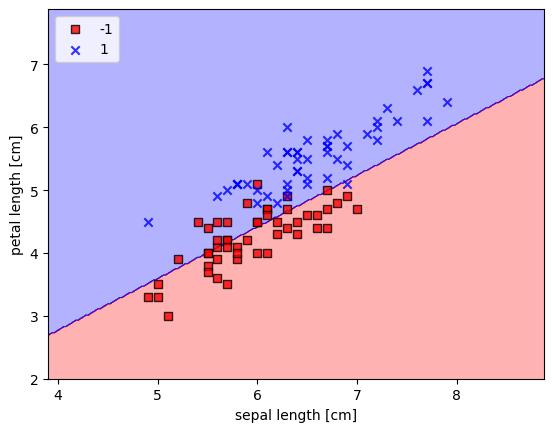

In [44]:
plot_decision_regions(X, Y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## data can classify the setosa flowers from other two species

In [45]:
dataS = df[df['Species'] != 'Iris-versicolor']

In [46]:
dataS.shape

(100, 5)

In [47]:
dataS.drop(columns = ['SepalWidthCm', 'PetalWidthCm'], inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13388\3670332481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataS.drop(columns = ['SepalWidthCm', 'PetalWidthCm'], inplace = True)


In [48]:
dataS

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
...,...,...,...
145,6.7,5.2,Iris-virginica
146,6.3,5.0,Iris-virginica
147,6.5,5.2,Iris-virginica
148,6.2,5.4,Iris-virginica


In [49]:
dataS['Species'] = np.where(dataS['Species'] == 'Iris-setosa', -1, 1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13388\2661503459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataS['Species'] = np.where(dataS['Species'] == 'Iris-setosa', -1, 1)


In [50]:
XS =  dataS.iloc[0:100, 0:2].values
YS = dataS['Species']

In [51]:
print(XS)
print(YS)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [6.3 6. ]
 [5.8 5.1]
 [7.1 5.9]
 [6.3 5.6]
 [6.5 5.8]
 [7.6 6.6]
 [4.9 4.5]
 [7.3 6.3]
 [6.7 5.8]
 [7.2 6.1]
 [6.5 5.1]
 [6.4 5.3]
 [6.8 5.5]
 [5.7 5. ]
 [5.8 5.1]
 [6.4 5.3]
 [6.5 5.5]
 [7.7 6.7]
 [7.7 6.9]
 [6.  5. ]
 [6.9 5.7]
 [5.6 4.9]
 [7.7 6.7]
 [6.3 4.9]
 [6.7 5.7]
 [7.2 6. ]
 [6.2 4.8]
 [6.1 4.9]
 [6.4 5.6]
 [7.2 5.8]
 [7.4 6.1]
 [7.9 6.4]
 [6.4 5.6]
 [6.3 5.1]
 [6.1 5.6]
 [7.7 6.1]
 [6.3 5.6]
 [6.4 5.5]
 [6.  4.8]
 [6.9 5.4]
 [6.7 5.6]

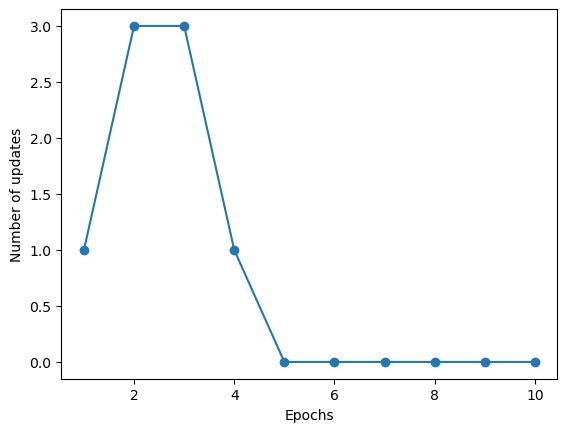

In [52]:
ppn2 = Perceptron(eta=0.01, n_iter=10)
ppn2.fit(XS, YS)
plt.plot(range(1, len(ppn2.errors_) + 1), 
    ppn2.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## Can Be Seperated As Linearly Seperable Using Perceptron Class

C:\Users\Admin\AppData\Local\Temp\ipykernel_13388\496644579.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


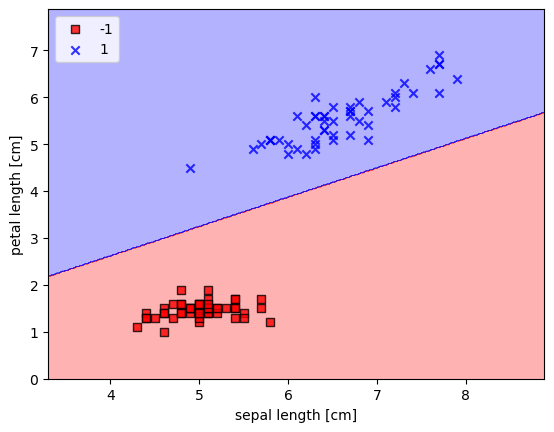

In [53]:
plot_decision_regions(XS, YS, classifier=ppn2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()